In [52]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.inspection import permutation_importance

In [53]:
#load the CSV data file in pandas frame
#df = pd.read_csv(r'C:\Users\keswa\OneDrive - Universiti Teknikal Malaysia Melaka\UTEM\BITU 3973 (FYP)\Data-Biochar-Yield.csv', index_col = 'Unnamed: 0')

# Try reading the CSV file with a different encoding
file_path = r'C:\Users\keswa\OneDrive - Universiti Teknikal Malaysia Melaka\UTEM\BITU 3973 (FYP)\Data-Biochar-Yield.csv'
try:
    df = pd.read_csv(file_path, index_col='Unnamed: 0', encoding='latin1')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, index_col='Unnamed: 0', encoding='iso-8859-1')

print(df.head())

   Fixed carbon  Volatile matter       Ash      C     H      O     N  \
0     18.006795        78.708947  3.284258  48.12  6.48  43.51  1.89   
1     18.006795        78.708947  3.284258  48.12  6.48  43.51  1.89   
2     18.006795        78.708947  3.284258  48.12  6.48  43.51  1.89   
3     18.006795        78.708947  3.284258  48.12  6.48  43.51  1.89   
4     18.006795        78.708947  3.284258  48.12  6.48  43.51  1.89   

   Residence time (min)  Temperature (°C)  Heating rate (°C/min)  \
0                    30               400                     15   
1                    60               400                     10   
2                    90               400                      5   
3                    30               500                     15   
4                    60               500                     10   

   Biochar yield (%)  
0              30.80  
1              26.60  
2              26.77  
3              23.57  
4              25.32  


In [54]:
# Data pre-processing
# Input the feedstock variable
features_values = [
    'Fixed carbon',
    'Volatile matter',
    'Ash',
    'C',
    'H',
    'O',
    'N',
    'Residence time (min)',
    'Temperature (°C)',
    'Heating rate (°C/min)',
]

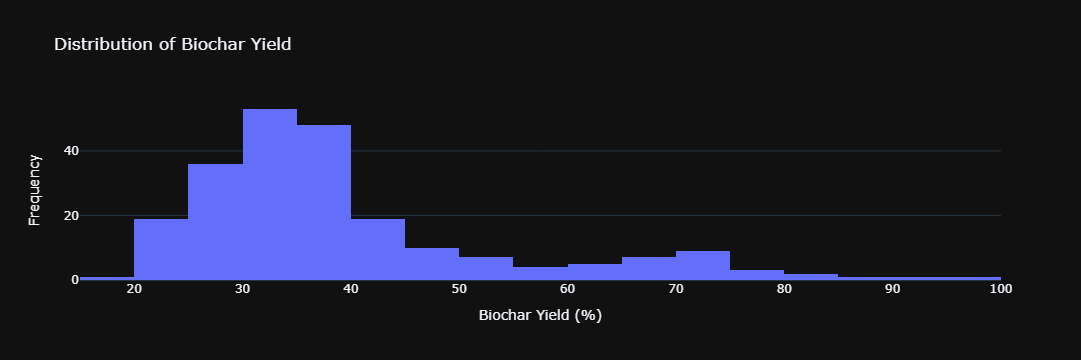

In [55]:
fig = px.histogram(
    df, 
    x='Biochar yield (%)', 
    histfunc='count', 
    template='plotly_dark', 
    title='Distribution of Biochar Yield',
    labels={'Biochar yield (%)': 'Biochar Yield (%)'},  # Renaming x-axis label
)

fig.update_layout(
    xaxis_title='Biochar Yield (%)',
    yaxis_title='Frequency'
)

fig.show()

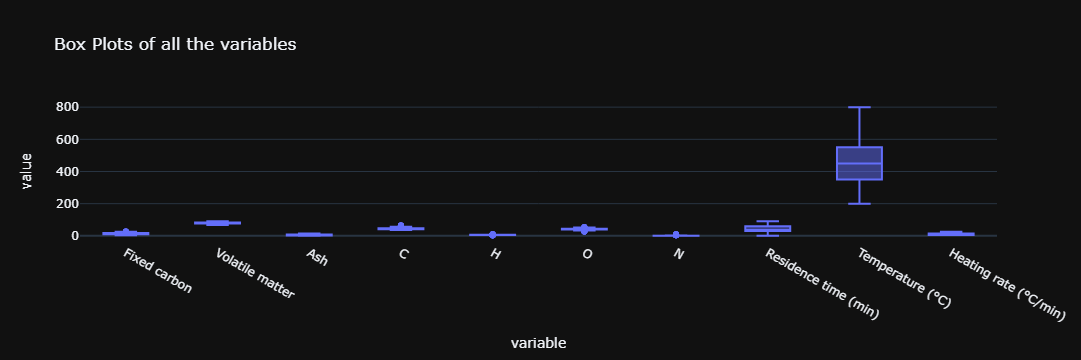

In [56]:
#Visualisation of all the variables (WWTP) 
fig = px.box(df, y=df.drop(['Biochar yield (%)'], axis=1).columns, template='plotly_dark', title='Box Plots of all the variables')
fig.show()

In [57]:
# Using KNeighborsRegressor algorithm to find mse

In [58]:
# Function to train and evaluate KNN model
def train_evaluate_knn(X_train, X_test, y_train, y_test, n_neighbors):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2, y_pred, knn


In [59]:
#' Residence time (min)','N','O'

In [60]:
#'Residence time (min)'
#'Residence time (min)','N','O'

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(['Biochar yield (%)'], axis=1))
X_scaled_df = pd.DataFrame(X_scaled, columns=df.drop(['Biochar yield (%)'], axis=1).columns)

print(X_scaled_df.head())

   Fixed carbon  Volatile matter       Ash        C         H        O  \
0       0.77843        -0.228527 -0.773912  0.72454  0.547071  0.17986   
1       0.77843        -0.228527 -0.773912  0.72454  0.547071  0.17986   
2       0.77843        -0.228527 -0.773912  0.72454  0.547071  0.17986   
3       0.77843        -0.228527 -0.773912  0.72454  0.547071  0.17986   
4       0.77843        -0.228527 -0.773912  0.72454  0.547071  0.17986   

          N  Residence time (min)  Temperature (°C)  Heating rate (°C/min)  
0  0.358599             -0.431791         -0.487082               0.639514  
1  0.358599              1.170587         -0.487082              -0.241767  
2  0.358599              2.772966         -0.487082              -1.123048  
3  0.358599             -0.431791          0.315839               0.639514  
4  0.358599              1.170587          0.315839              -0.241767  


In [61]:
#Split the dataset into features and target variable
target_variable = 'Biochar yield (%)'

X = X_scaled_df
y = df[target_variable]

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

Mean Square Error of Biochar Yield (%): 110.8479

The model explains 56.11% of the variability in the biochar yield.


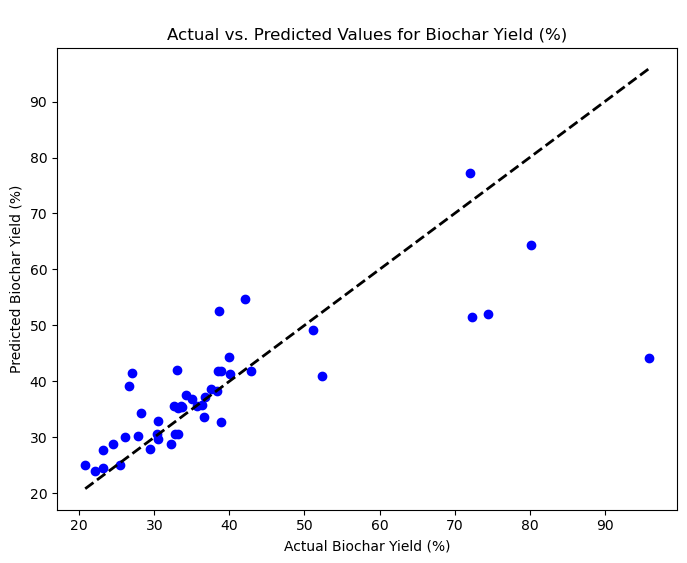

In [62]:
# Train and evaluate KNN model for all features
overall_mse, overall_r2, y_pred, overall_knn = train_evaluate_knn(X_train, X_test, y_train, y_test, n_neighbors=5)

print("\033[1;33;40mMean Square Error of Biochar Yield (%): {:.4f}\033[0m".format(overall_mse))
#print("\033[1;31;47m\nAccuracy of Biochar Yield (R^2 Score): {:.4f}\033[0m".format(overall_r2))

if overall_r2 == 1:
    print("\033[1;31;47m\nThe model perfectly predicts the biochar yield.\033[0m")
elif overall_r2 == 0:
    print("\033[1;31;47m\nThe model does not explain any variability in the biochar yield.\033[0m")
else:
    print("\033[1;31;47m\nThe model explains {:.2f}% of the variability in the biochar yield.\033[0m".format(overall_r2 * 100))


# Visualize Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual Biochar Yield (%)')
plt.ylabel('Predicted Biochar Yield (%)')
plt.title('\nActual vs. Predicted Values for Biochar Yield (%)')
plt.show()

In [63]:
#Using Permutation Importance Algorithm to find best features

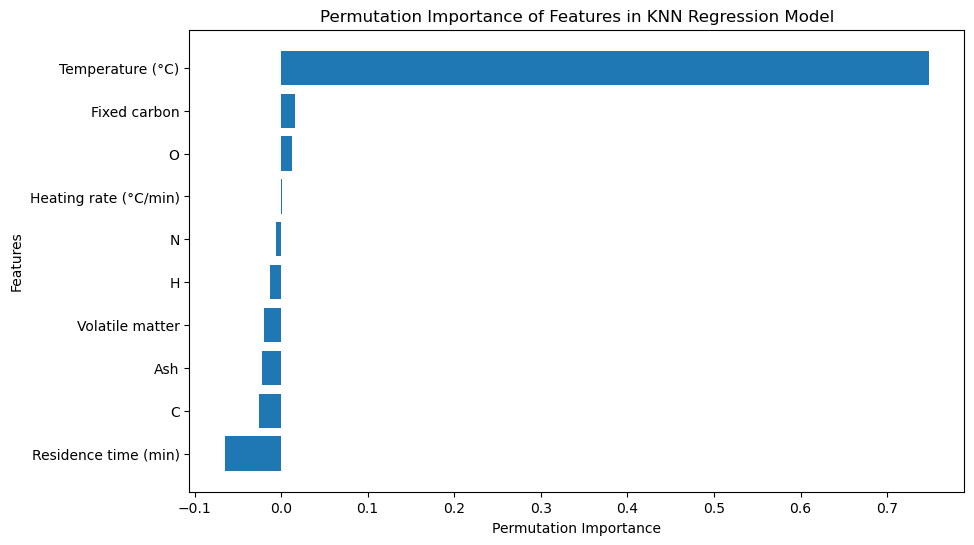

In [64]:
# Calculate permutation importance
perm_importance = permutation_importance(overall_knn, X_test, y_test, n_repeats=30, random_state=32)

# Get the feature names
feature_names = X.columns

# Sort features by their importance scores
sorted_indices = perm_importance.importances_mean.argsort()[::1]

# Plot the permutation importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_indices], perm_importance.importances_mean[sorted_indices])
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Permutation Importance of Features in KNN Regression Model')
plt.show()

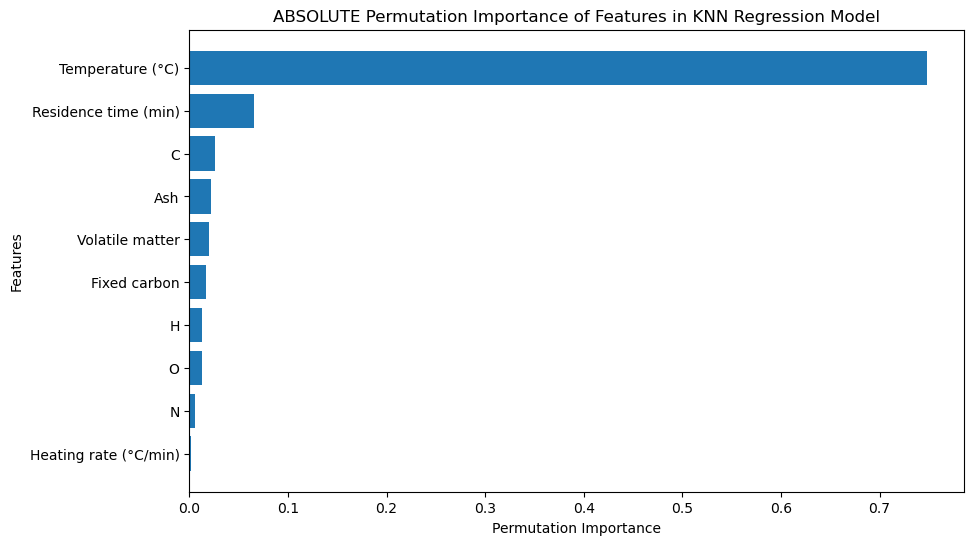

In [65]:
# Calculate permutation importance
perm_importance = permutation_importance(overall_knn, X_test, y_test, n_repeats=30, random_state=32)

# Get the feature names
feature_names = X.columns

# Ensure importance values are positive by taking absolute values
positive_importances = np.abs(perm_importance.importances_mean)

# Sort features by their importance scores in descending order
sorted_indices = positive_importances.argsort()[::-1]

# Plot the permutation importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_indices], positive_importances[sorted_indices])
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('ABSOLUTE Permutation Importance of Features in KNN Regression Model')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


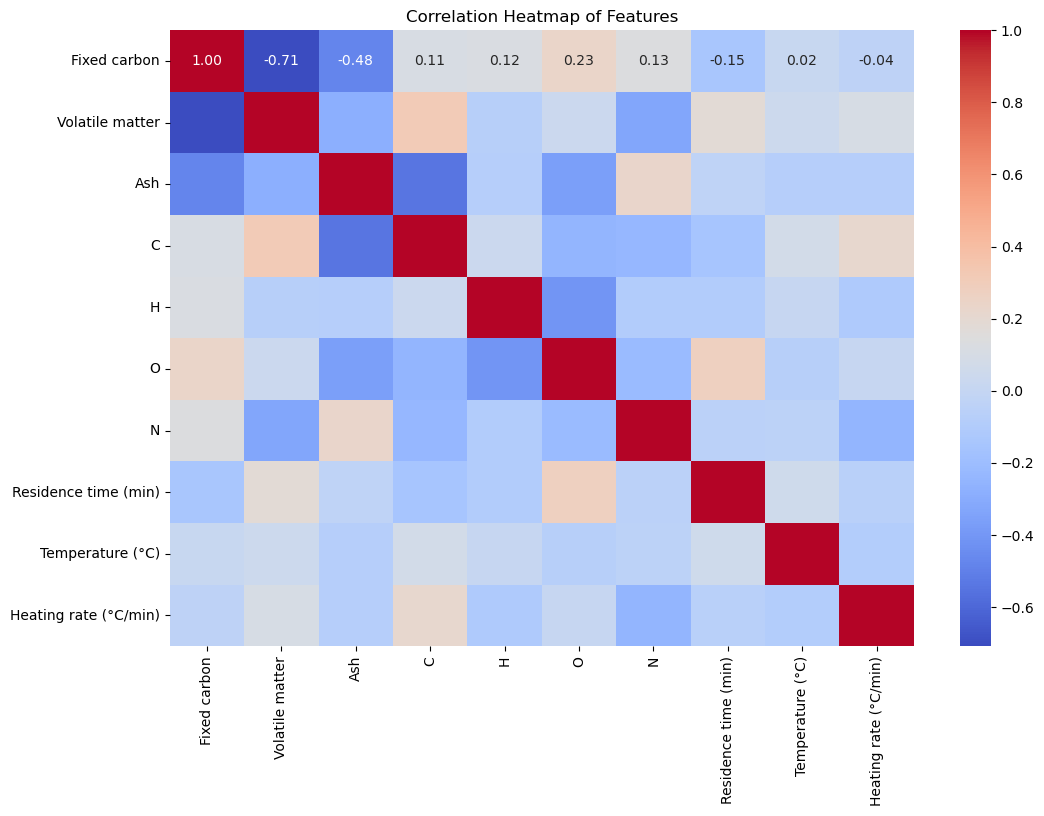

In [66]:
# Calculate the correlation matrix
corr_matrix = X_scaled_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [67]:
# using forward feature selection to find important features

,Number of Features Selected,Selected Features,MSE
0,1,['Temperature (°C)'],60.508922
1,2,"['Temperature (°C)', 'Fixed carbon']",44.259031
2,3,"['Temperature (°C)', 'Fixed carbon', 'N']",40.135406
3,4,"['Temperature (°C)', 'Fixed carbon', 'N', 'O']",48.479943
4,5,"['Temperature (°C)', 'Fixed carbon', 'N', 'O', 'C']",44.286583
5,6,"['Temperature (°C)', 'Fixed carbon', 'N', 'O', 'C', 'Heating rate (°C/min)']",49.142010
6,7,"['Temperature (°C)', 'Fixed carbon', 'N', 'O', 'C', 'Heating rate (°C/min)', 'Ash']",57.557702
7,8,"['Temperature (°C)', 'Fixed carbon', 'N', 'O', 'C', 'Heating rate (°C/min)', 'Ash', 'H']",62.661469
8,9,"['Temperature (°C)', 'Fixed carbon', 'N', 'O', 'C', 'Heating rate (°C/min)', 'Ash', 'H', 'Volatile matter']",74.933532
9,10,"['Temperature (°C)', 'Fixed carbon', 'N', 'O', 'C', 'Heating rate (°C/min)', 'Ash', 'H', 'Volatile matter', 'Residence time (min)']",110.825311


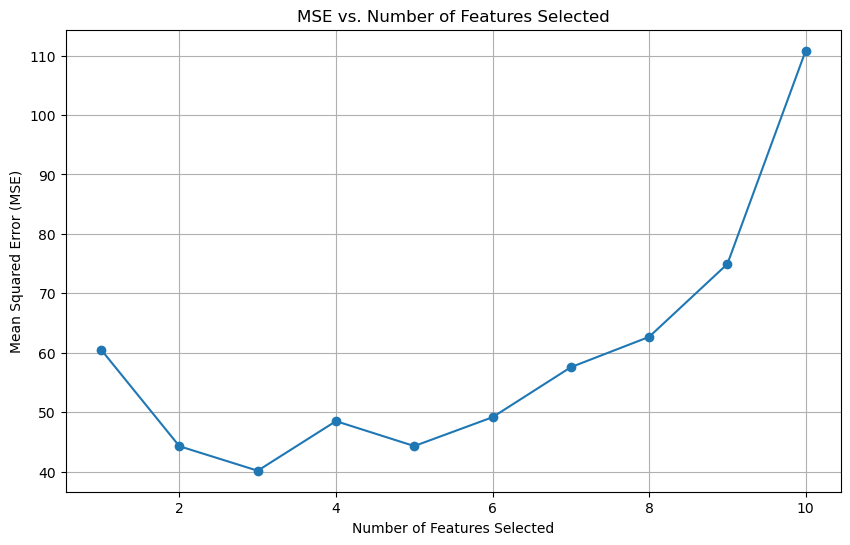

In [68]:
# Initialize lists to store results for visualization
mse_list = []
selected_features_list = []

# Initialize an empty list to store selected features
selected_features = []
best_mse = float('inf')  # Initialize with a high value

# Define the maximum number of features to consider
max_features = len(X.columns)

# Loop over the maximum number of features to select
for i in range(max_features):
    temp_best_mse = float('inf')  # Temporary variable to store the best MSE in this iteration
    best_feature = None  # Best feature found in this iteration
    
    for feature in X.columns:
        if feature not in selected_features:
            # Create a new list with the current selected features plus the new feature to evaluate
            temp_selected_features = selected_features + [feature]
            
            # Train and evaluate KNN model with the selected features
            current_mse, _, _, _ = train_evaluate_knn(X_train[temp_selected_features], X_test[temp_selected_features], y_train, y_test, n_neighbors=5)

            # If the MSE improves, update the best MSE and best feature for this iteration
            if current_mse < temp_best_mse:
                temp_best_mse = current_mse
                best_feature = feature
    
    # Add the best feature to the selected features if found
    if best_feature is not None:
        selected_features.append(best_feature)
        mse_list.append(temp_best_mse)
        selected_features_list.append(list(selected_features))

# Create a DataFrame to display the selected features at each step
feature_selection_df = pd.DataFrame({
    'Number of Features Selected': range(1, len(selected_features_list) + 1),
    'Selected Features': selected_features_list,
    'MSE': mse_list
})

# Display the DataFrame in a styled table format for better visualization
styled_df = feature_selection_df.style.set_properties(**{'text-align': 'left'}).set_table_styles([
    dict(selector='th', props=[('text-align', 'left')])
])
display(styled_df)

# Plot the MSE vs. number of features selected
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mse_list) + 1), mse_list, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Number of Features Selected')
plt.grid(True)
plt.show()
